Investigar si los datasets tienen encabezados, datos nulos, sustituir los datos nulos si es que existieran, y en qué columna se encuentra la salida. Finalmente obtener las matrices X y Y.
Obtener el modelo "W" óptimo de cada dataset utilizando el optimizador Gradiente Descendente.
Obtener el ACCURACY de sus modelos y comparar los desempeños de cada modelo.
También obtener ROC, AUC, y la MATRIZ DE CONFUSIÓN de forma gráfica, de cada modelo
¿Qué modelo es mejor y cuál es la razón?
Implementar la Regresión Logística utilizando la librería de Sklearn, comparar el Score de la librería con el Accuracy que ustedes calcularon del Gradiente Descendente.
En un documento en Jupyter deberán incluir:

    La lectura de los datasets y su transformación a las matrices X y Y, respectivamente
    La implementación de la regresión logística utilizando el GD, y sus mediciones de desempeño
    La implementación de la regresión logística utilizando la librería Sklearn y su score para cada dataset
    Hacer dos comparaciones:
        Las mediciones de cada dataset utilizando GD y Sklearn
        Las resultados obtenidos entre datasets
    Responder la pregunta: ¿Por qué el modelo de un dataset tiene mejor desempeño que el otro?, sustentar su respuesta.

Subir el Notebook correspondiente, incluyendo anotaciones, comentarios, títulos y subtítulos.

# Skalearn library
water potability data set

In [6]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [7]:
#1. Load dataset
data = pd.read_csv('water_potability.csv')
# data.head()
data = data.dropna()
# data

dataset = np.array(data)
m, n = np.shape(dataset)
print('Rows:', m, 'Columns:', n)

x = dataset[:, 0:9]
y = dataset[:, -1]
y = y.reshape(-1, 1)
print('x:', np.shape(x))
print('y:', np.shape(y))

Rows: 2011 Columns: 10
x: (2011, 9)
y: (2011, 1)


In [8]:
#Normalize
def normalize(x):
    x_norm = (x - np.mean(x, axis=0)) / np.std(x,axis=0)
    return x_norm

scaler = StandardScaler()
scaler.fit(x)

X_norm = scaler.transform(x)


In [9]:
#2. Prepare data: add Bias and split dataset

print(np.shape(X_norm))

def Bias(X):
    ones = np.ones((len(X),1))
    X1 = np.concatenate((ones, X), axis=1)
    return X1

x = Bias(X_norm)

print('x shape: ', np.shape(x))

test_size = 0.2
xTrain, xTest, yTrain, yTest = train_test_split(x, y,test_size = test_size)
print('Split X', len(x), 'rows into train with', len(xTrain), 'and test with', len(xTest))
print('Split Y', len(y), 'rows into train with', len(yTrain), 'and test with', len(yTest))

yTrain = yTrain.reshape(-1,1)
yTest = yTest.reshape(-1,1)

print('xTrain shape:',np.shape(xTrain), 'yTrain shape:', np.shape(yTrain))
print('xTest shape:', np.shape(xTest), 'yTest shape:', np.shape(yTest))


(2011, 9)
x shape:  (2011, 10)
Split X 2011 rows into train with 1608 and test with 403
Split Y 2011 rows into train with 1608 and test with 403
xTrain shape: (1608, 10) yTrain shape: (1608, 1)
xTest shape: (403, 10) yTest shape: (403, 1)


In [10]:
#3.1 Logistic function
def h(x, w):
    wx = np.dot(x, w.T)
    z = 1 / (1 + np.exp(-wx))
    return z

In [11]:
#3.2 Cost function
def cost(x, y, w):
    m, n = np.shape(x)
    c = (-1 / m)*np.sum(y * np.log(h(x, w)) + (1 - y) * np.log((1 - h(x, w))))
    return c


In [12]:
#3.3 Gradient function
def grad(x, y, w):
    m, n = np.shape(x)
    g = (1 / m) * np.dot(x.T,(h(x, w)-y))
    return g

In [13]:
# 3.4 Gradient Descent function
def gd(x, y, w, alpha = 0.001, its = 1000):
    it = 0
    costo = 0
    J = {}
    while it < its:
        # Gradient
        gradiente = grad(x, y, w)
            
        #Cost function
        costo = cost(x, y, w)
            
        #Updating w
        w = w - alpha * gradiente.T
                
        #Storing cost
        J[it] = costo
   
        it += 1
              
    return w, J

Initial Cost (training data): 0.6931471805599452
Cost after training (training data): 0.6722539883277237
Cost after training (testing data): 0.6742508992008941
W: [[-0.390969    0.04414386  0.01583401  0.0977111   0.03655846 -0.03738786
  -0.02937195 -0.02454232  0.02525489  0.03714889]]


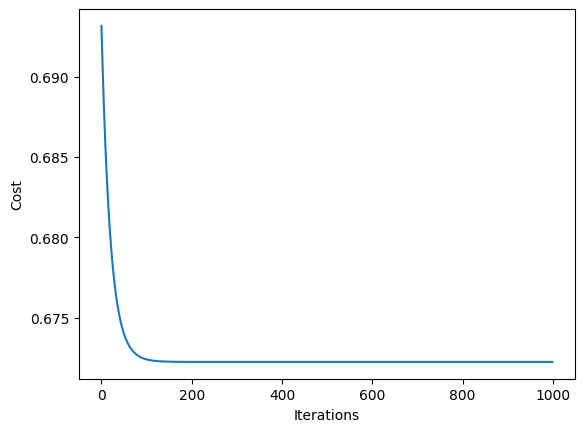

In [14]:
# Test the gradient descent
alpha = 0.1
its = 1000

m, n = np.shape(x)
w = np.zeros((1, n))

print('Initial Cost (training data):', cost(xTrain, yTrain, w))

#Gradient
w, J = gd(xTrain, yTrain, w, alpha, its)

print('Cost after training (training data):', cost(xTrain, yTrain, w))
print('Cost after training (testing data):', cost(xTest, yTest, w))

print('W:',w)

#Plot the cost over the iterations
plt.plot(J.keys(), J.values())
plt.xlabel('Iterations')
plt.ylabel('Cost');

In [15]:
# 4.1 Accuracy

def accuracy(x, y, w):

    Ynew = list(map(lambda x: 1 if x >= 0.5 else 0, h(x, w)))

    Ynew = np.array(Ynew)
    Ynew = Ynew.reshape(-1, 1)
    suma = (y == Ynew).sum()

    a = suma/len(y)

    return a, suma


accTrain, tptnTrain = accuracy(xTrain, yTrain, w)
accTest, tptnTest = accuracy(xTest, yTest, w)
print('Training accuracy:', accTrain, tptnTrain, 'out of', len(yTrain))
print('Testing accuracy:', accTest, tptnTest, 'out of', len(yTest))


Training accuracy: 0.6032338308457711 970 out of 1608
Testing accuracy: 0.6004962779156328 242 out of 403


In [16]:
# 4.2 Obtain TPR and FPR

# a) Define the prediction function for a variable threshold
def predict(p, threshold):
    y_hat = list(map(lambda x: 1 if x >= threshold else 0, p))
    return y_hat

# b) Define the values function, where you can count the tp, tn, fp, and fn


def values(y, pred):

    # YOURCODE
    tp = tn = fn = fp = 0
    for i in range(len(y)):
        if y[i]:
            if y[i] == pred[i]:
                tp += 1
            else:
                fn += 1
        else:
            if y[i] == pred[i]:
                tn += 1
            else:
                fp += 1

    V = {'TP': tp, 'TN': tn, 'FN': fn, 'FP': fp}
    return V

# c) Define the TPR function


def tpr(V):

    tpr = V["TP"] / (V["TP"] + V["FN"])

    return tpr

# d) Define the FPR function


def fpr(V):

    fpr = V["FP"] / (V["FP"] + V['TN'])

    return fpr


# Test your functions
pred = predict(h(x, w), 0.5)
Val = values(yTrain, pred)
print('Prediction shape: ', np.shape(pred))
print('Values: ', Val)

print('Sensitivity (TPR): %.2F' %
      tpr(Val), 'portion were correctly classified as TP')
print('FPR: %.2F' % fpr(Val), 'portion were classified as FP')


Prediction shape:  (2011,)
Values:  {'TP': 5, 'TN': 950, 'FN': 644, 'FP': 9}
Sensitivity (TPR): 0.01 portion were correctly classified as TP
FPR: 0.01 portion were classified as FP


Text(0.5, 1.0, 'Receiver Operating Characteristic')

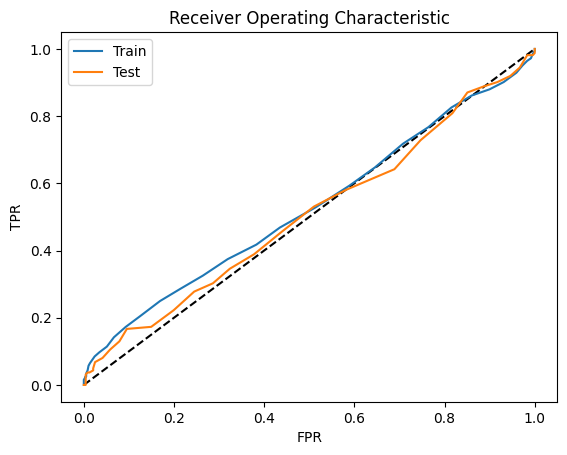

In [17]:
def ROC(y, p):

    # YOURCODE
    threshold = np.arange(0, 1, 0.005)
    TPR = np.zeros(len(threshold))
    FPR = np.zeros(len(threshold))

    for thr in range(len(threshold)):
        pred = predict(p, threshold[thr])
        TPR[thr] = tpr(values(y, pred))
        FPR[thr] = fpr(values(y, pred))

    return TPR, FPR


# ROC curve for Training
Tpr, Fpr = ROC(yTrain, h(xTrain, w))
plt.plot([0, 1], [0, 1], 'k--',)
plt.plot(Fpr, Tpr, '-', label="Train")

# ROC curve for Testing
Tpr1, Fpr1 = ROC(yTest, h(xTest, w))
plt.plot(Fpr1, Tpr1, '-', label="Test")

# Plot the curves
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('Receiver Operating Characteristic')


In [18]:
# AUC (Area under curve) calculus

# AUC for Training
rectangle_roc = 0
rectangle_roc1 = 0
for i in range(len(Tpr)-1):
    rectangle_roc += (Fpr[i] - Fpr[i+1]) * Tpr[i]
print('AUC Training: ', rectangle_roc)

# AUC for Testing

for i in range(len(Tpr1)-1):
    rectangle_roc1 += (Fpr1[i] - Fpr1[i+1]) * Tpr1[i]
print('AUC Testing: ', rectangle_roc1)


AUC Training:  0.5497332062963637
AUC Testing:  0.5314789201372879


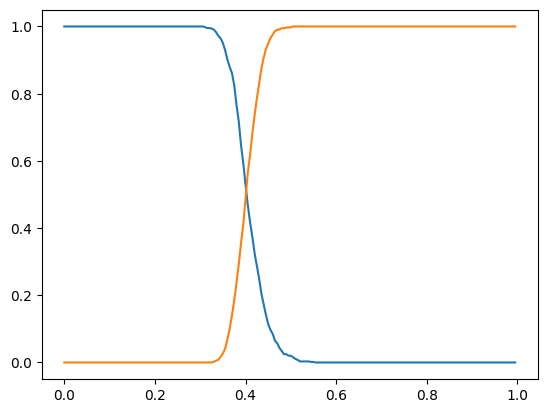

In [19]:
# Specificity and Sensitivity behaviour

thrs = np.arange(0, 1, 0.005)
plt.plot(thrs, Tpr)
plt.plot(thrs, 1 - Fpr)


In [22]:
from sklearn.metrics import confusion_matrix

pred = predict(h(xTrain, w), 0.4)
cm = confusion_matrix(yTrain, pred)
print(cm)

[[466 493]
 [306 343]]


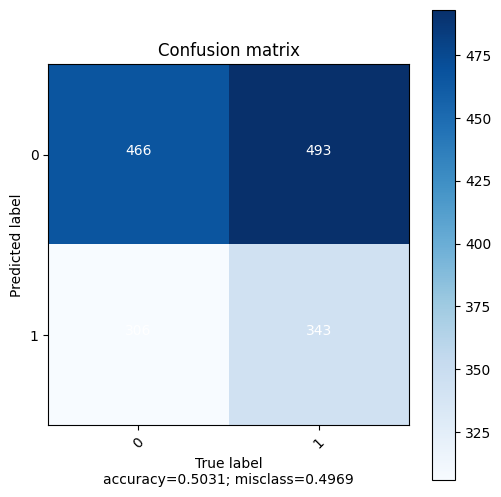

In [23]:
def plot_confusion_matrix(values, classes):
    import itertools
    m, n = values.shape

    accuracy = np.trace(values) / float(np.sum(values))
    misclass = 1 - accuracy

    plt.figure(figsize=(5, 5))
    plt.imshow(values, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion matrix')
    plt.colorbar()

    marks = np.arange(len(classes))
    plt.xticks(marks, classes, rotation=45)
    plt.yticks(marks, classes)

    thresh = values.max() / 2
    for i, j in itertools.product(range(m), range(n)):
        plt.text(j, i, "{:,}".format(values[i, j]),
                 horizontalalignment="center",
                 color="white" if values[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
#Testing the function

plot_confusion_matrix(values = cm, classes = ['0', '1'])


# Normalize funtion
water potability data set